<a href="https://www.kaggle.com/code/johnolutoki/covid19-data-analysis-using-python?scriptVersionId=114103561" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <center> Covid 19 Data Analysis </center>
<center>
  <img src="https://www.iotworldtoday.com/files/2020/03/coronavirus-crisis-management.jpg" />
</center>
<!-- <img src="https://www.iotworldtoday.com/files/2020/03/coronavirus-crisis-management.jpg" style="float: center;"/>
 -->

</n>
Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Most people who fall sick with COVID-19 will experience mild to moderate symptoms and recover without special treatment. However, some will become seriously ill and require medical attention. It stuck to the world and left a scathing mark.

In this analysis, I'll show the effect of the virus on several countries. The data I used in this analysis was gotten from the <a href='https://covid19.who.int/data'>WHO database</a> 

### Let's Import the modules 

We will start by importing some useful `Python` `libraries`. ***Numpy*** and ***Pandas***  are for performing mathematical operations and manipulating data; We will start by importing some useful Python libraries. Tabulate is a Pandas series and dataframe pretty-printing library; ***Seaborn*** and ***Matplolib*** are visualisation libraries for creating informative visuals.

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')

## INITIAL EXPLORATION

Importing daily cases and deaths by date reported to WHO

In [2]:
df=pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-data.csv')
    
# df=pd.read_csv("../input/covid19/covid19_Confirmed_dataset.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


## Data Description

- `Date_reported` : Date of reporting to WHO
- `Country_code`: String	ISO Alpha-2 country code
- `Country`	String	Country, territory, area
- `WHO_region`	String	WHO regional offices: WHO Member States are grouped into six WHO regions -- Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).
- `New_cases`	Integer 	New confirmed cases. Calculated by subtracting previous cumulative case count from current cumulative cases count.*
- `Cumulative_cases`	Integer	Cumulative confirmed cases reported to WHO to date.
- `New_deaths`	Integer	New confirmed deaths. Calculated by subtracting previous cumulative deaths from current cumulative deaths.*
- `Cumulative_deaths`	Integer	Cumulative confirmed deaths reported to WHO to date.

In [3]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.557230e+05,2.557230e+05,255723.000000,2.557230e+05
mean,2.533886e+03,1.017721e+06,25.976670,1.506260e+04
std,1.611708e+04,4.834837e+06,147.413258,6.633419e+04
min,-8.261000e+03,0.000000e+00,-2437.000000,0.000000e+00
25%,0.000000e+00,7.840000e+02,0.000000,8.000000e+00
50%,1.700000e+01,2.151300e+04,0.000000,2.690000e+02
75%,4.390000e+02,2.750495e+05,5.000000,4.248000e+03
max,1.265520e+06,9.852587e+07,11447.000000,1.077129e+06


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255723 entries, 0 to 255722
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Date_reported      255723 non-null  object
 1   Country_code       254644 non-null  object
 2   Country            255723 non-null  object
 3   WHO_region         255723 non-null  object
 4   New_cases          255723 non-null  int64 
 5   Cumulative_cases   255723 non-null  int64 
 6   New_deaths         255723 non-null  int64 
 7   Cumulative_deaths  255723 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 15.6+ MB


In [5]:
df.shape

(255723, 8)

In [6]:
df.describe(include='all')

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,255723,254644,255723,255723,2.557230e+05,2.557230e+05,255723.000000,2.557230e+05
unique,1079,236,237,7,NaN,NaN,NaN,NaN
top,2020-12-07,DE,Venezuela (Bolivarian Republic of),EURO,NaN,NaN,NaN,NaN
freq,237,1079,1079,66898,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,2.533886e+03,1.017721e+06,25.976670,1.506260e+04
std,NaN,NaN,NaN,NaN,1.611708e+04,4.834837e+06,147.413258,6.633419e+04
min,NaN,NaN,NaN,NaN,-8.261000e+03,0.000000e+00,-2437.000000,0.000000e+00
25%,NaN,NaN,NaN,NaN,0.000000e+00,7.840000e+02,0.000000,8.000000e+00
50%,NaN,NaN,NaN,NaN,1.700000e+01,2.151300e+04,0.000000,2.690000e+02
75%,NaN,NaN,NaN,NaN,4.390000e+02,2.750495e+05,5.000000,4.248000e+03


## Initial Notes

- The dataset comprises 254064 rows and 8 columns.
- Just one of those columns (`Country_code`) contains about `1142` missing datas
- Date data `(Date_reported)` are stored as object data instead of datetime or numerical data and it contains about 1072 unique datas

## Objectives 
I'd be moving forward with the following rows and columns and I'd be answering the following question
- What `countries` have the highest number of new cases and death
- What `countries` have the highest number of cumulative cases and deaths
- What `WHO_region` which also signifies each continent are mostly affected 
- Using the vaccination information also to answer likely causes of why the countries have the most deaths 

## Removing Unwanted Columns and Converting the date from object to datetime format
`Country_code` seems to be the same with the country itsef so i am going to drop the country code and converting the `Date_reported` column from object to datetime format to enable me remove the year since that's all i want to deal with

In [7]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'], errors='coerce')


In [8]:
df['year'] = df['Date_reported'].dt.year

In [9]:
df.drop(['Country_code','Date_reported'],axis=1,inplace=True)
df.head(10)

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
0,Afghanistan,EMRO,0,0,0,0,2020
1,Afghanistan,EMRO,0,0,0,0,2020
2,Afghanistan,EMRO,0,0,0,0,2020
3,Afghanistan,EMRO,0,0,0,0,2020
4,Afghanistan,EMRO,0,0,0,0,2020
5,Afghanistan,EMRO,0,0,0,0,2020
6,Afghanistan,EMRO,0,0,0,0,2020
7,Afghanistan,EMRO,0,0,0,0,2020
8,Afghanistan,EMRO,0,0,0,0,2020
9,Afghanistan,EMRO,0,0,0,0,2020


In [10]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bonaire',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Cayman Islands', 'Central African Republic', 'Chad',
       'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', 'Côte d’Ivoire', 'Croatia', 'Cuba', 'Curaçao',
       'Cyprus', 'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvado

## Analysis Of Data

Flitering the data to better understand  and answer the question. 

The data will be sorted in this analysis from the nation with the most COVID-19 cases to the nation with the fewest. The nation with the highest fatalities will be identified as we continue our investigation. We will identify the nations in our study that do the best the best job of preventing the epidemic from spreading.

### Countries with most cumulative covid 19 cases

From the nation with the most COVID-19 cases to the nation with the fewest, the countries are ranked here. Then, we will determine the causes behind each nation's amassing of such numbers.

In [11]:
covid_Cumulative_cases = pd.DataFrame(df.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

covid_Cumulative_cases.head()

,Cumulative_cases
Country,
United States of America,44696319178
India,25377799286
Brazil,18061573858
France,12314083304
Germany,10600225677


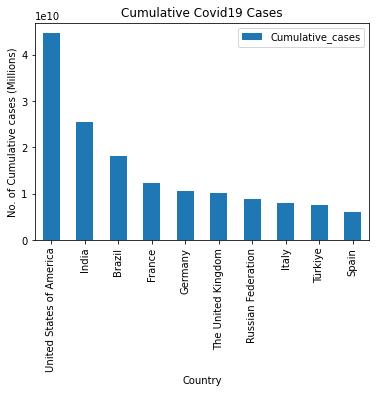

In [12]:
covid_Cumulative_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases (Millions)',title = 'Cumulative Covid19 Cases')
plt.show()


## Countries with the least covid19 cases

In [13]:
covid_Cumulative_least_cases = pd.DataFrame(df.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=True,axis=0)

covid_Cumulative_least_cases.head(20)

,Cumulative_cases
Country,
Democratic People's Republic of Korea,0
Tokelau,0
Turkmenistan,0
Pitcairn Islands,600
Niue,14285
Holy See,22912
Tuvalu,89570
Saint Helena,175868
Saba,190124


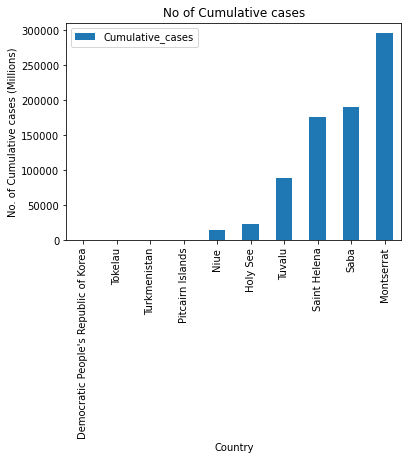

In [14]:
covid_Cumulative_least_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases (Millions)',title = 'No of Cumulative cases')
plt.show()


In [15]:
covid_new_cases = pd.DataFrame(df.groupby("Country")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=False,axis=0)

covid_new_cases.head()

,New_cases
Country,
United States of America,98525870
India,44675609
France,37660476
Germany,36946574
Brazil,35751411


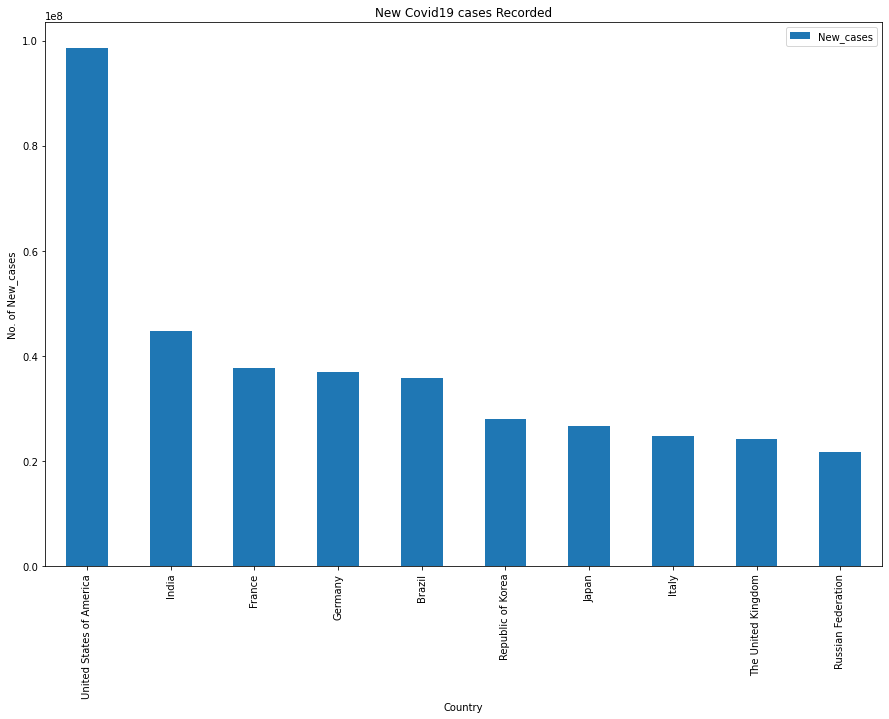

In [16]:
covid_new_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_cases',title = 'New Covid19 cases Recorded', figsize=(15,10))
plt.show()

In [17]:
covid_least_new_cases = pd.DataFrame(df.groupby("Country")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=True,axis=0)

covid_least_new_cases.head(10)

,New_cases
Country,
Tokelau,0
Democratic People's Republic of Korea,0
Turkmenistan,0
Pitcairn Islands,4
Holy See,26
Niue,212
Saba,737
Other,764
Sint Eustatius,1210


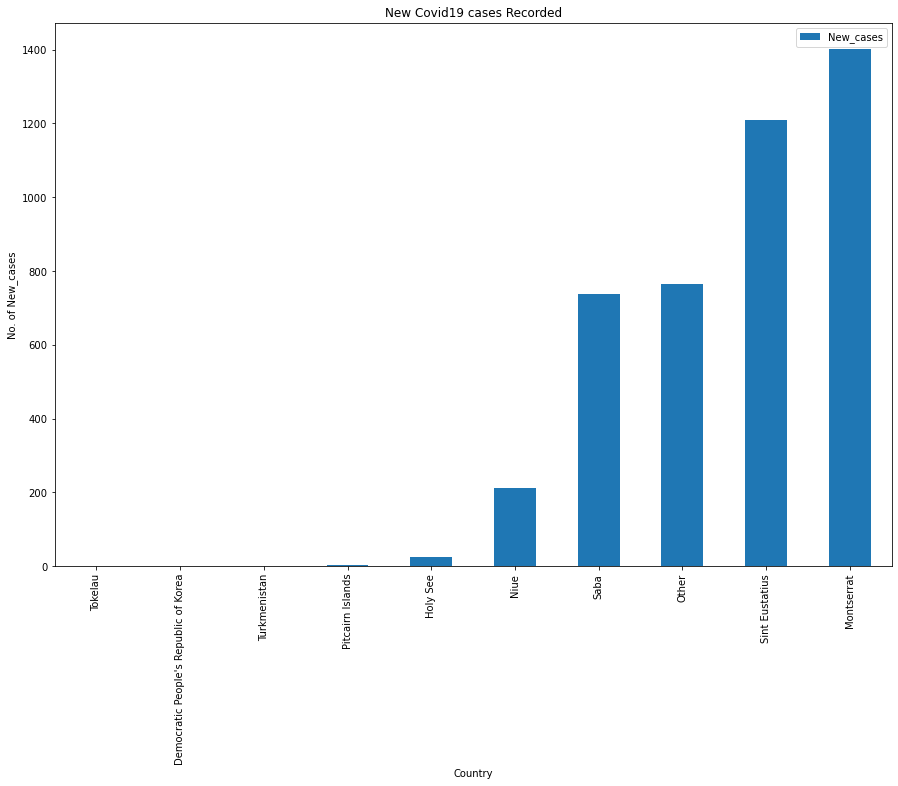

In [18]:
covid_least_new_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_cases',title = 'New Covid19 cases Recorded', figsize=(15,10))
plt.show()

In [19]:
covid_new_death = pd.DataFrame(df.groupby("Country")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=False,axis=0)

covid_new_death.head()

,New_deaths
Country,
United States of America,1077129
Brazil,691449
India,530663
Russian Federation,392891
Mexico,330743


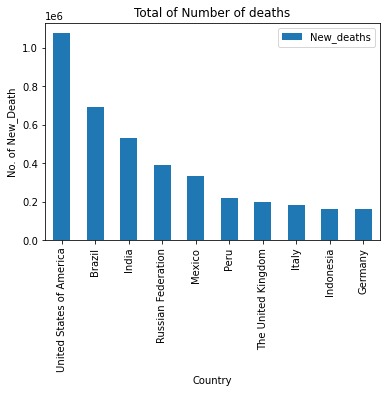

In [20]:
covid_new_death.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_Death',title = 'Total of Number of deaths')
plt.show()

In [21]:
covid_new_least_death = pd.DataFrame(df.groupby("Country")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=True,axis=0)

covid_new_least_death.head(10)

,New_deaths
Country,
Tuvalu,0
Turkmenistan,0
Niue,0
Holy See,0
Democratic People's Republic of Korea,0
Tokelau,0
Saint Helena,0
Falkland Islands (Malvinas),0
Pitcairn Islands,0


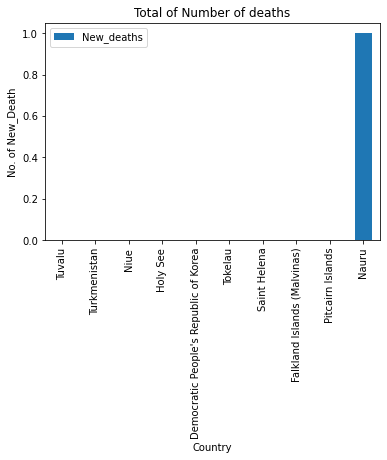

In [22]:
covid_new_least_death.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of New_Death',title = 'Total of Number of deaths')
plt.show()

In [23]:
covid_Cumulative_deaths = pd.DataFrame(df.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

covid_Cumulative_deaths.head()

,Cumulative_deaths
Country,
United States of America,619790816
Brazil,428816457
India,320348814
Mexico,222843458
Russian Federation,192542472


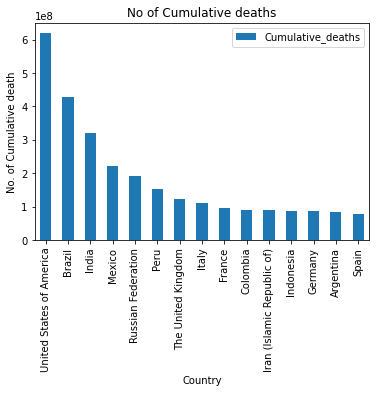

In [24]:
covid_Cumulative_deaths.head(15).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative death',title = 'No of Cumulative deaths')
plt.show()

In [25]:
covid_Cumulative_least_deaths = pd.DataFrame(df.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=True,axis=0)

covid_Cumulative_least_deaths.head(10)

,Cumulative_deaths
Country,
Tuvalu,0
Niue,0
Tokelau,0
Democratic People's Republic of Korea,0
Turkmenistan,0
Saint Helena,0
Holy See,0
Falkland Islands (Malvinas),0
Pitcairn Islands,0


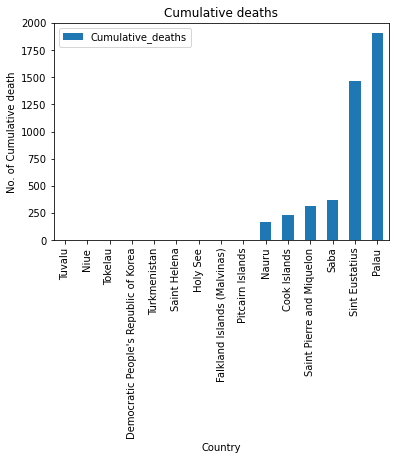

In [26]:
covid_Cumulative_least_deaths.head(15).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative death',title = 'Cumulative deaths')
plt.show()

In [27]:
covid_cum_new_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_cases']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_cases'],ascending=False,axis=0)

covid_cum_new_year.head(10)

,,Cumulative_cases
Country,year,
United States of America,2022,29915512146
India,2022,15113235308
Brazil,2022,11010005012
France,2022,10070412259
Germany,2022,9106563342
The United Kingdom,2022,7630394496
Russian Federation,2022,6359096757
Italy,2022,6322221283
Republic of Korea,2022,5874850053


In [28]:
covid_cum_new_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_cases']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_cases'],ascending=True,axis=0)

covid_cum_new_year.head(10)

,,Cumulative_cases
Country,year,
American Samoa,2020,0
Cook Islands,2020,0
Democratic People's Republic of Korea,2020,0
Kiribati,2020,0
Micronesia (Federated States of),2020,0
Nauru,2020,0
Niue,2020,0
Palau,2020,0
Pitcairn Islands,2020,0


In [29]:
covid_New_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year.head(10)

,,New_cases
Country,year,
United States of America,2022,44991584
Germany,2022,29781566
France,2022,28177894
Republic of Korea,2022,27431844
Japan,2022,24934926
Italy,2022,18727976
Brazil,2022,13487577
Russian Federation,2022,11201339
The United Kingdom,2022,10647395


In [30]:
covid_New_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year.head(10)

,,New_cases
Country,year,
American Samoa,2020,0
Cook Islands,2020,0
Democratic People's Republic of Korea,2020,0
Kiribati,2020,0
Micronesia (Federated States of),2020,0
Nauru,2020,0
Niue,2020,0
Palau,2020,0
Pitcairn Islands,2020,0


In [31]:
covid_cum_death_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['Cumulative_deaths']
                               .agg('sum')).sort_values(by=['year', 'Cumulative_deaths'],ascending=False,axis=0)

covid_cum_death_cases_year.head(10)

,,Cumulative_deaths
Country,year,
United States of America,2022,348753547
Brazil,2022,233529643
India,2022,182268259
Russian Federation,2022,130394744
Mexico,2022,113901857
Peru,2022,74568906
The United Kingdom,2022,62685916
Italy,2022,58259862
Indonesia,2022,54224079


In [32]:
covid_new_death_cases_year = pd.DataFrame(df.groupby(["Country",'year'])['New_deaths']
                               .agg('sum')).sort_values(by=['year', 'New_deaths'],ascending=False,axis=0)

covid_new_death_cases_year.head(10)

,,New_deaths
Country,year,
United States of America,2022,258074
Russian Federation,2022,84031
Brazil,2022,72632
India,2022,49583
The United Kingdom,2022,48343
Italy,2022,45172
Germany,2022,41421
France,2022,35638
Japan,2022,34171


In [33]:
cases_2020 = df[df['year']== 2020]

cases_2020.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
0,Afghanistan,EMRO,0,0,0,0,2020
1,Afghanistan,EMRO,0,0,0,0,2020
2,Afghanistan,EMRO,0,0,0,0,2020
3,Afghanistan,EMRO,0,0,0,0,2020
4,Afghanistan,EMRO,0,0,0,0,2020


In [34]:
covid_New_cases_year_cases_2020 = pd.DataFrame(cases_2020.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year_cases_2020.head(10)

,,New_cases
Country,year,
United States of America,2020,19577585
India,2020,10266674
Brazil,2020,7563551
Russian Federation,2020,3159297
France,2020,2564972
The United Kingdom,2020,2563566
Türkiye,2020,2194272
Italy,2020,2083689
Spain,2020,1955216


In [35]:
covid_New_cases_year_cases_2020 = pd.DataFrame(cases_2020.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year_cases_2020.head(10)

,,New_cases
Country,year,
American Samoa,2020,0
Cook Islands,2020,0
Democratic People's Republic of Korea,2020,0
Kiribati,2020,0
Micronesia (Federated States of),2020,0
Nauru,2020,0
Niue,2020,0
Palau,2020,0
Pitcairn Islands,2020,0


In [36]:
cases_2021 = df[df['year']== 2021]

cases_2021.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
364,Afghanistan,EMRO,183,52513,12,2201,2021
365,Afghanistan,EMRO,73,52586,10,2211,2021
366,Afghanistan,EMRO,123,52709,10,2221,2021
367,Afghanistan,EMRO,200,52909,9,2230,2021
368,Afghanistan,EMRO,102,53011,7,2237,2021


In [37]:
covid_New_cases_year_cases_2021 = pd.DataFrame(cases_2021.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year_cases_2021.head(10)

,,New_cases
Country,year,
United States of America,2021,33956701
India,2021,24572130
Brazil,2021,14700283
The United Kingdom,2021,10878081
Russian Federation,2021,7340685
Türkiye,2021,7247492
France,2021,6917610
Germany,2021,5430538
Iran (Islamic Republic of),2021,4973945


In [38]:
covid_New_cases_year_cases_2021 = pd.DataFrame(cases_2021.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year_cases_2021.head(10)

,,New_cases
Country,year,
Cook Islands,2021,0
Democratic People's Republic of Korea,2021,0
Holy See,2021,0
Kiribati,2021,0
Marshall Islands,2021,0
Micronesia (Federated States of),2021,0
Nauru,2021,0
Niue,2021,0
Pitcairn Islands,2021,0


In [39]:
cases_2022 = df[df['year']== 2022]

cases_2022.head()

,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,year
729,Afghanistan,EMRO,0,158059,0,7356,2022
730,Afghanistan,EMRO,53,158112,0,7356,2022
731,Afghanistan,EMRO,44,158156,5,7361,2022
732,Afghanistan,EMRO,15,158171,3,7364,2022
733,Afghanistan,EMRO,36,158207,2,7366,2022


In [40]:
covid_New_cases_year_cases_2022 = pd.DataFrame(cases_2022.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=False,axis=0)

covid_New_cases_year_cases_2022.head(10)

,,New_cases
Country,year,
United States of America,2022,44991584
Germany,2022,29781566
France,2022,28177894
Republic of Korea,2022,27431844
Japan,2022,24934926
Italy,2022,18727976
Brazil,2022,13487577
Russian Federation,2022,11201339
The United Kingdom,2022,10647395


In [41]:
covid_New_cases_year_cases_2022 = pd.DataFrame(cases_2022.groupby(["Country",'year'])['New_cases']
                               .agg('sum')).sort_values(by=['year', 'New_cases'],ascending=True,axis=0)

covid_New_cases_year_cases_2022.head(10)

,,New_cases
Country,year,
Democratic People's Republic of Korea,2022,0
Holy See,2022,0
Other,2022,0
Tokelau,2022,0
Turkmenistan,2022,0
Pitcairn Islands,2022,4
Niue,2022,212
Tajikistan,2022,293
Saba,2022,706


## Coronavirus Cases in different Continents
What `WHO_region` which also signifies each continents are mostly affected

In [42]:
covid_region_Cumulative_deaths = pd.DataFrame(df.groupby("WHO_region")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

covid_region_Cumulative_deaths

,Cumulative_deaths
WHO_region,
AMRO,1759778568
EURO,1199604843
SEARO,463405730
EMRO,214167536
WPRO,110523768
AFRO,104359973
Other,13115


In [43]:
covid_region_New_deaths = pd.DataFrame(df.groupby("WHO_region")['New_deaths']
                               .agg('sum')).sort_values(by='New_deaths',ascending=False,axis=0)

covid_region_New_deaths

,New_deaths
WHO_region,
AMRO,2880893
EURO,2146230
SEARO,802643
EMRO,348991
WPRO,288992
AFRO,175070
Other,13


In [44]:
covid_region_Cumulative_cases = pd.DataFrame(df.groupby("WHO_region")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

covid_region_Cumulative_cases

,Cumulative_cases
WHO_region,
EURO,100315606438
AMRO,86240495288
SEARO,32699250456
WPRO,23683657468
EMRO,12350496155
AFRO,4964405049
Other,778372


In [45]:
covid_region_New_cases = pd.DataFrame(df.groupby("WHO_region")['New_cases']
                               .agg('sum')).sort_values(by='New_cases',ascending=False,axis=0)

covid_region_New_cases

,New_cases
WHO_region,
EURO,267915602
AMRO,184159754
WPRO,102544181
SEARO,60713309
EMRO,23209837
AFRO,9429464
Other,764


Cumulative and new cases  American region had more cases than other regions probably due to the high recorded in USA and EURO recorded more cumulative and new deaths, it was observed <a href='https://www.researchgate.net/publication/356481471_Estimates_of_global_SARS-CoV-2_infection_exposure_infection_morbidity_and_infection_mortality_rates_in_2020'>this article</a> that most of the death that happened in the EURO region happened in the year 2022 when the new variant was out and the restriction has been lifted. 

In [46]:
Covid_19 = df

## Coronavirus cases/death in Africa which is AFRO

In [47]:
africa_cases= Covid_19[Covid_19['WHO_region'] =='AFRO']
#  top ten most affected countries

top_countries = pd.DataFrame(africa_cases.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)


top_countries.head(10)

,Cumulative_cases
Country,
South Africa,2272518892
Ethiopia,279342583
Kenya,192526186
Zambia,167466579
Nigeria,165937037
Algeria,159947929
Réunion,148466191
Botswana,146021094
Zimbabwe,118483126


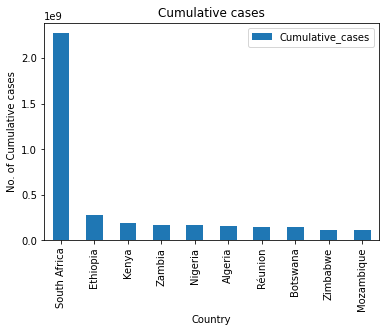

In [48]:
top_countries.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases',title = 'Cumulative cases')
plt.show()

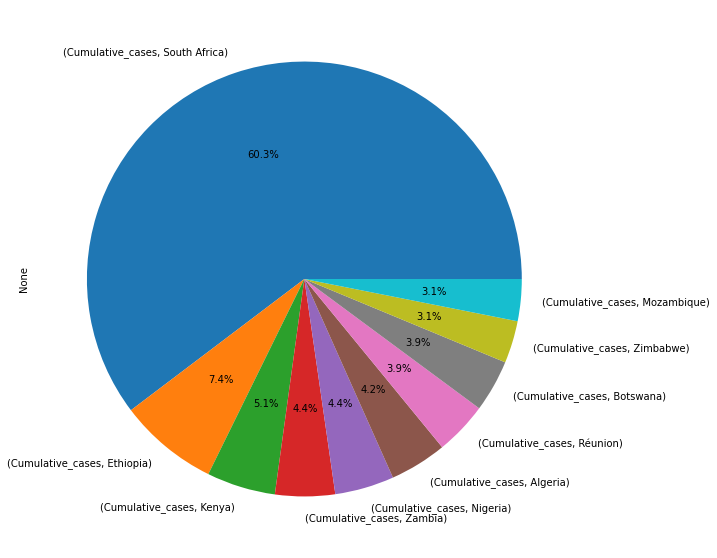

In [49]:
top_countries.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 10),
    legend=False,
    )
plt.show()

In [50]:
africa_cases= Covid_19[Covid_19['WHO_region']=='AFRO']
# sum of total cases in africa
africa_cases['Cumulative_cases'].sum()

print('Africa has a total cumulative cases of about', africa_cases['Cumulative_cases'].sum()) 

Africa has a total cumulative cases of about 4964405049


## Cumulative Death Cases

In [51]:
# Top ten cases in Africa
africa_death_cases=Covid_19[Covid_19['WHO_region']=='AFRO']
africa_death_cases=pd.DataFrame(africa_death_cases.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)
africa_death_cases.head(10)

,Cumulative_deaths
Country,
South Africa,62751767
Ethiopia,4402009
Algeria,4321970
Kenya,3449315
Zimbabwe,2987667
Zambia,2292916
Namibia,2144179
Nigeria,2137177
Uganda,1897417


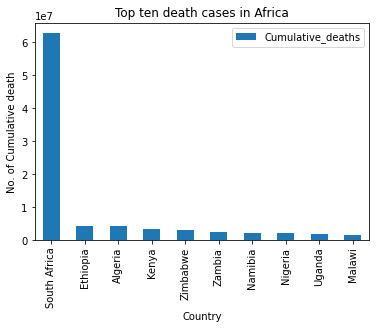

In [52]:
africa_death_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative death',title = 'Top ten death cases in Africa')
plt.show()

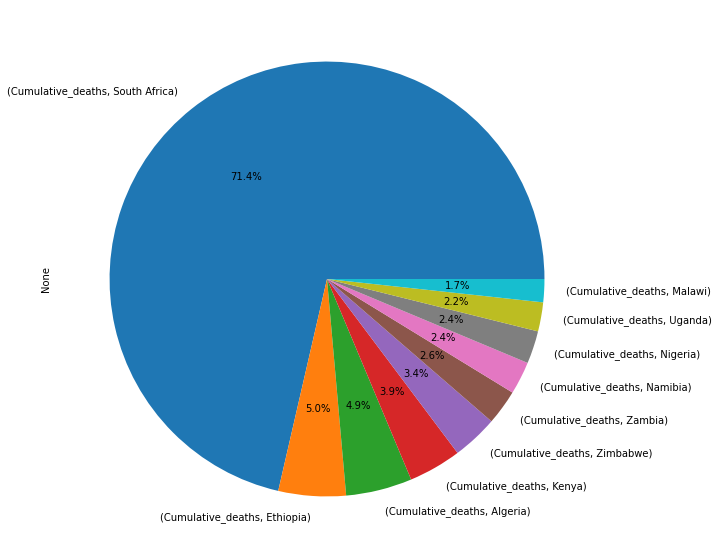

In [53]:
africa_death_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 10),
    legend=False,
    )
plt.show()

In [54]:
africa_death_cases=Covid_19[Covid_19['WHO_region']=='AFRO']
# sum of total  death cases in europe

print('Africa has a total cumulative death of about', africa_death_cases['Cumulative_deaths'].sum()) 

Africa has a total cumulative death of about 104359973


Africa seems to have it better than other countries of the world in terms despite being the second most populous continent, several reports were made about how they were able to curtail the virus, <a href='https://gdc.unicef.org/resource/coronavirus-africa-five-reasons-why-covid-19-has-been-less-deadly-elsewhere'> some said</a> we are better prepared amidst many others while <a href='https://www.nytimes.com/2022/03/23/health/covid-africa-deaths.html'>others</a> believe it's due to low testing and lack of proper databank. 

In all of this, the case of South Africa seems peculiar as they are the most hit country in this pandemic, they have recorded the most cases and deaths, The spread of the virus accelerated in South Africa as the southern hemisphere went into winter but as it became warmer, the number of cases dropped significantly, impacting the continental outlook, as South Africa accounts for almost half the total number of cases and deaths on the continent.

## Coronavirus cases in America which is AMRO

According to the information provided above, the United States not only had the greatest number of coronavirus cases in North America, but also ranked first globally. Let's now learn about the cases in the remaining parts of North America.

In [55]:
america_cases= Covid_19[Covid_19['WHO_region']=='AMRO']
#  top ten most affected countries

america_cases = pd.DataFrame(america_cases.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)
america_cases.head(10)

,Cumulative_cases
Country,
United States of America,44696319178
Brazil,18061573858
Argentina,4840468855
Colombia,3675459515
Mexico,3394473569
Peru,2120865870
Chile,1923855476
Canada,1864730171
Cuba,532752318


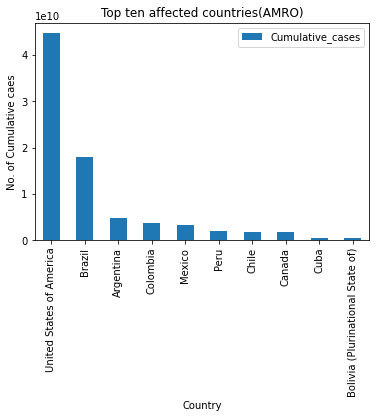

In [56]:
america_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative caes',title = 'Top ten affected countries(AMRO)')
plt.show()

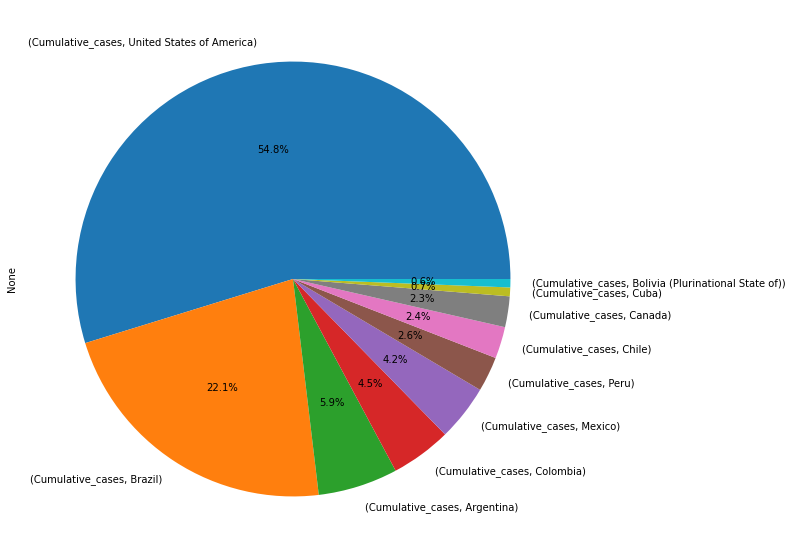

In [57]:
america_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 10),
    legend=False,
    )
plt.show()

The United States of America (USA) has the most cases, as was demonstrated above.

In [58]:
america_cases= Covid_19[Covid_19['WHO_region']=='AMRO']
# sum of total cases in america
print('America has a total Cumulative cases of about', america_cases['Cumulative_cases'].sum()) 

America has a total Cumulative cases of about 86240495288


## Cumulative Death Cases

In [59]:
# Top ten cases in America
america_death_cases=Covid_19[Covid_19['WHO_region']=='AMRO']
# america_death_cases=america_death_cases[['Country','Cumulative_deaths','New_deaths']]
# top_countries=america_death_cases.sort_values('Cumulative_deaths',ascending=False)
# top_countries=top_countries.head(10)
# top_countries


america_death_cases = pd.DataFrame(america_death_cases.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

america_death_cases.head(10)

,Cumulative_deaths
Country,
United States of America,619790816
Brazil,428816457
Mexico,222843458
Peru,152252554
Colombia,88594293
Argentina,83879092
Chile,32844788
Canada,25806687
Ecuador,23421358


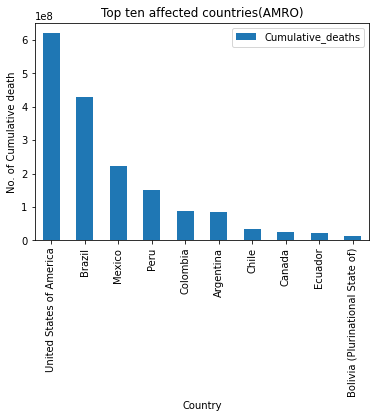

In [60]:
america_death_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative death',title = 'Top ten affected countries(AMRO)')
plt.show()

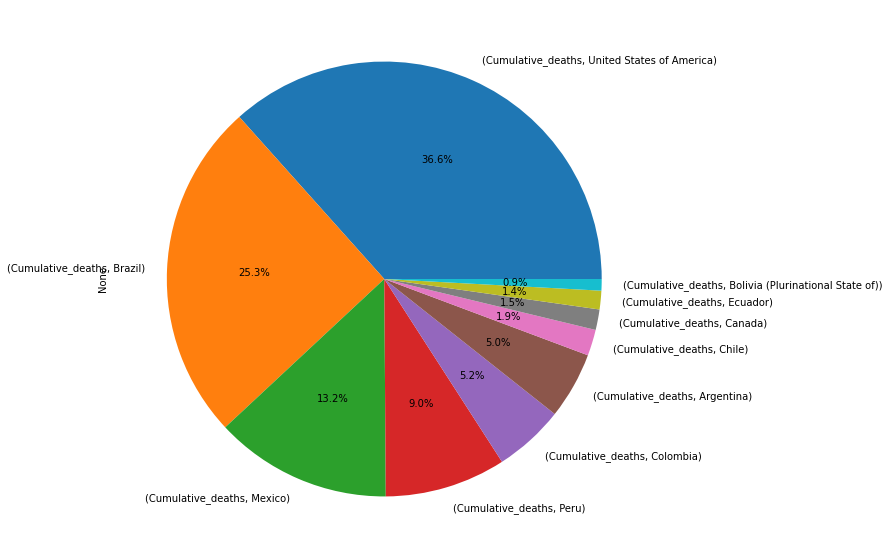

In [61]:
america_death_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(10, 10),
    legend=False,
    )
plt.show()

In [62]:
# america_death_cases=Covid_19[Covid_19['WHO_region']=='AMRO']
# # sum of total cases in North America 


america_cases= Covid_19[Covid_19['WHO_region']=='AMRO']
# sum of total cases in america
print('America has a total Cumulative death of about', america_death_cases['Cumulative_deaths'].sum()) 

America has a total Cumulative death of about 1759778568


## Coronavirus cases in South-East Asia which is SEARO

Southeast Asia is composed of eleven countries of impressive diversity in religion, culture and history: Bangladesh, Bhutan, Democratic People's Republic of Korea, India, Indonesia, Maldives, Myanmar, Nepal, Sri Lanka, Thailand, Timor-Leste. 

In [63]:
southeast_cases= Covid_19[Covid_19['WHO_region']=='SEARO']
#  top ten most affected countries
# top_countries=southeast_cases.sort_values('Cumulative_cases',ascending=False).head(10)
# top_countries[['Country','Cumulative_cases']]

southeast_cases = pd.DataFrame(southeast_cases.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)
southeast_cases.head()

,Cumulative_cases
Country,
India,25377799286
Indonesia,3134052449
Thailand,1703339707
Bangladesh,1140257818
Nepal,570449519


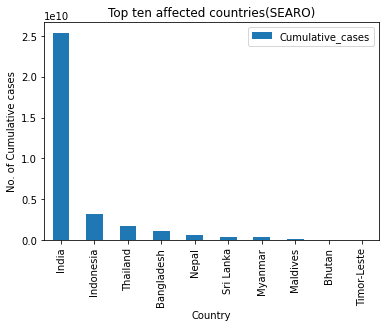

In [64]:
southeast_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases',title = 'Top ten affected countries(SEARO)')
plt.show()

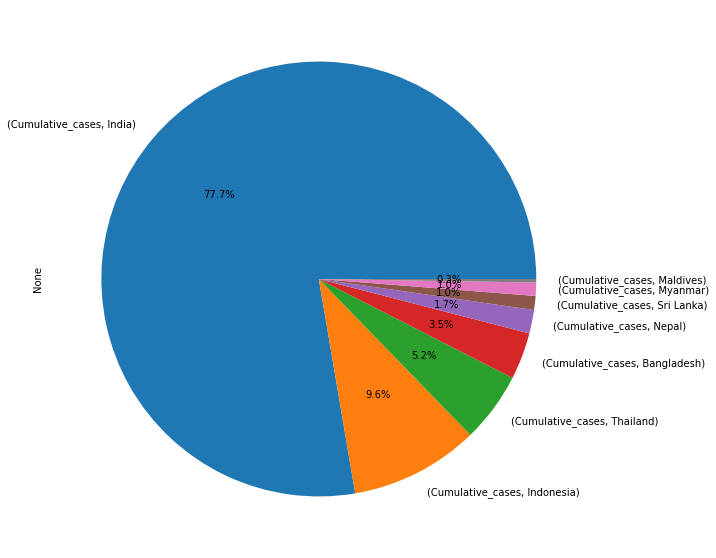

In [65]:
southeast_cases.head(8).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [66]:
southeast_cases= Covid_19[Covid_19['WHO_region']=='SEARO']
# sum of total cases in South east Asia

print('South East Asia has a total Cumulative Cases of about', southeast_cases['Cumulative_cases'].sum()) 

South East Asia has a total Cumulative Cases of about 32699250456


## Cumulative Deaths 

In [67]:
# Top ten cases in South east Asia
southeast_death_cases=Covid_19[Covid_19['WHO_region']=='SEARO']
southeast_death_cases = pd.DataFrame(southeast_death_cases.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

southeast_death_cases.head(10)

,Cumulative_deaths
Country,
India,320348814
Indonesia,86994121
Bangladesh,17653979
Thailand,12853252
Myanmar,10319736
Sri Lanka,7863133
Nepal,7132211
Maldives,170763
Timor-Leste,63251


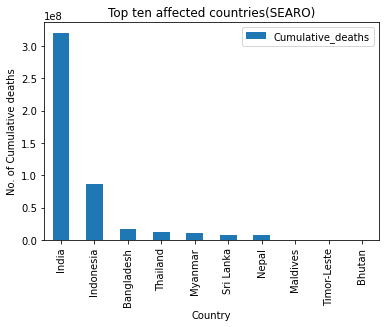

In [68]:
southeast_death_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative deaths',title = 'Top ten affected countries(SEARO)')
plt.show()

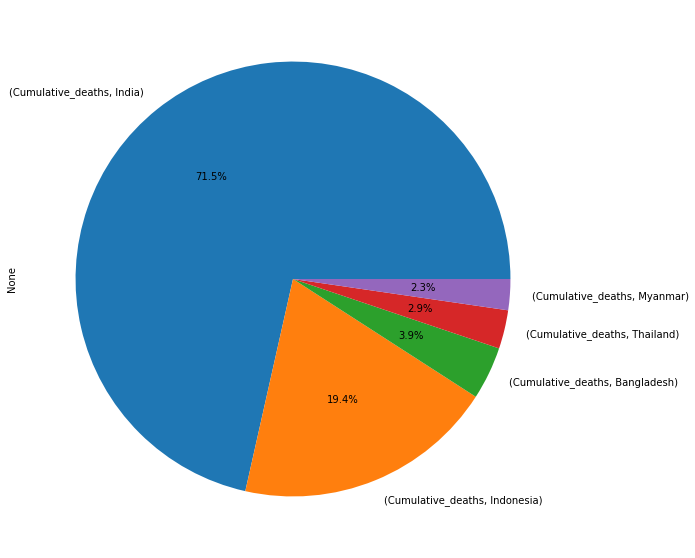

In [69]:
southeast_death_cases.head(5).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [70]:
southeast_death_cases= Covid_19[Covid_19['WHO_region']=='SEARO']
# sum of total cases in South east Asia


print('South East Asia has a total Cumulative Deaths of about', southeast_death_cases['Cumulative_deaths'].sum()) 

South East Asia has a total Cumulative Deaths of about 463405730


## Coronavirus cases in Europe which is EURO

In [71]:
europe_cases = Covid_19[Covid_19['WHO_region']=='EURO']
#  top ten most affected countries
europe_cases = pd.DataFrame(europe_cases.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)
europe_cases.head()

,Cumulative_cases
Country,
France,12314083304
Germany,10600225677
The United Kingdom,10086392667
Russian Federation,8905656524
Italy,7957457869


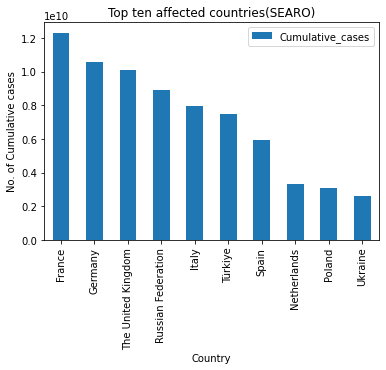

In [72]:
europe_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases',title = 'Top ten affected countries(SEARO)')
plt.show()

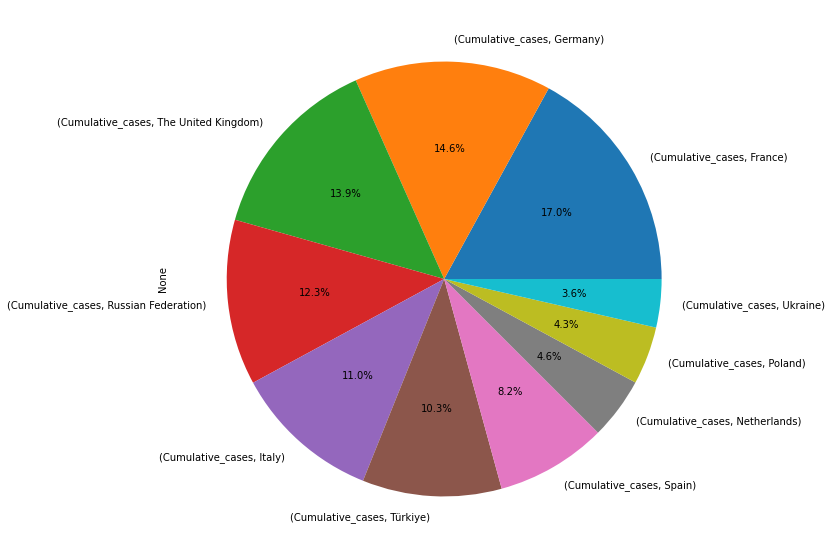

In [73]:
europe_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [74]:
europe_cases = Covid_19[Covid_19['WHO_region']=='EURO']
# sum of total cases in Europe

print('Europe has a total Cumulative Cases of about', europe_cases['Cumulative_cases'].sum()) 

Europe has a total Cumulative Cases of about 100315606438


## Cumulative Deaths

In [75]:
europe_deaths_cases = Covid_19[Covid_19['WHO_region']=='EURO']
# sum of total cases in Europe
europe_deaths_cases = pd.DataFrame(europe_deaths_cases.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

In [76]:
europe_deaths_cases.head(10)

,Cumulative_deaths
Country,
Russian Federation,192542472
The United Kingdom,121472600
Italy,112300465
France,97397530
Germany,86611122
Spain,76840141
Poland,65947678
Ukraine,57235801
Türkiye,54284820


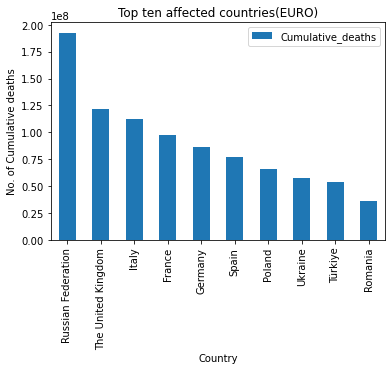

In [77]:
europe_deaths_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative deaths',title = 'Top ten affected countries(EURO)')
plt.show()

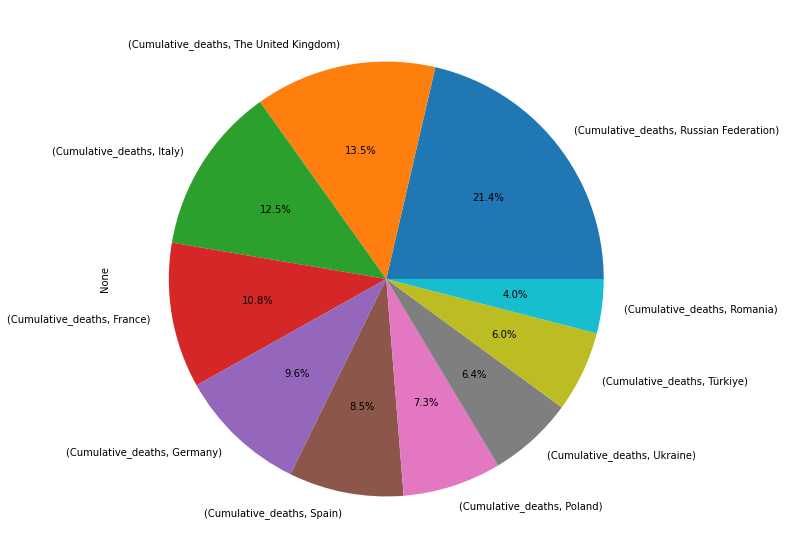

In [78]:
europe_deaths_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [79]:
europe_deaths_cases = Covid_19[Covid_19['WHO_region']=='EURO']
# sum of total cases in Europe

print('Europe has a total Cumulative Deaths of about', europe_deaths_cases['Cumulative_deaths'].sum()) 

Europe has a total Cumulative Deaths of about 1199604843


In 2021, after the lockdown, Russia had the world's second-highest death toll from the COVID-19 pandemic, behind the United States, <a href='https://www.rand.org/pubs/research_briefs/RB5056.html'>Many attributed</a>it to the increased deaths due to accidents, injuries, violence, and other preventable causes and it was suggested that broader public health education, similar to that in the United States, can help Russians improve health behaviours while <a href='https://www.reuters.com/world/europe/russias-covid-19-death-toll-climbs-worlds-second-highest-2021-12-30/'>others</a> blamed it on the vaccination rate.

## Coronavirus cases in Eastern Mediterranean which is EMRO

The countries and territories of the Eastern Mediterranean include Cyprus, Turkey (Anatolia), its smaller Hatay Province, the Greek Dodecanese islands, and the countries of Lebanon, Syria, Palestine, Israel, Jordan and Egypt.

In [80]:
emro_cases = Covid_19[Covid_19['WHO_region']=='EMRO']
#  top ten most affected countries
emro_cases = pd.DataFrame(emro_cases.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

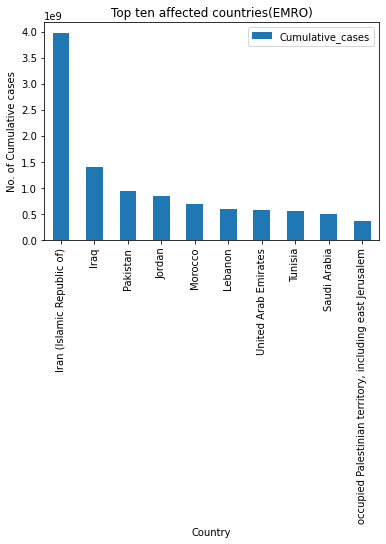

In [81]:
emro_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases',title = 'Top ten affected countries(EMRO)')
plt.show()

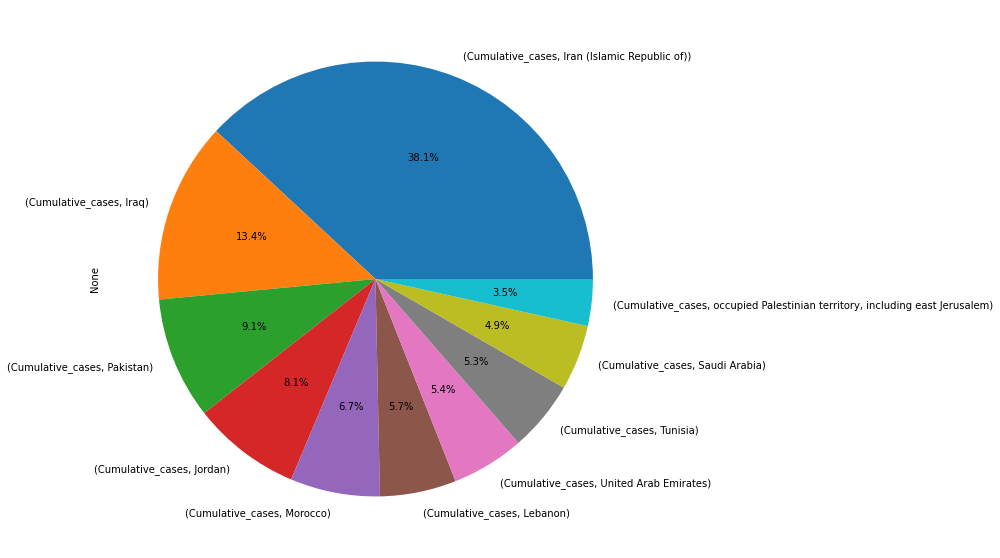

In [82]:
# plt.pie(top_countries['Cumulative_cases'],labels=top_countries['Country'])
# plt.show()

emro_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [83]:
emro_cases= Covid_19[Covid_19['WHO_region']=='EMRO']
# sum of total cases in Eastern Mediterranean

print('Eastern Mediterranean has a total Cumulative Cases of about', emro_cases['Cumulative_cases'].sum()) 

Eastern Mediterranean has a total Cumulative Cases of about 12350496155


## Cumulative Deaths

In [84]:
emro_death_cases = Covid_19[Covid_19['WHO_region']=='EMRO']
# sum of total cases in Europe
# emro_death_cases[['Country','Cumulative_deaths','New_deaths']]

emro_death_cases = pd.DataFrame(emro_death_cases.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

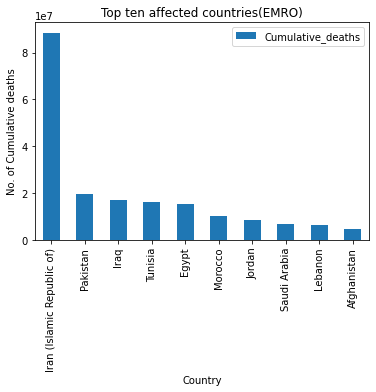

In [85]:
# top_countries=emro_death_cases.sort_values('Cumulative_deaths',ascending=False)
# top_countries=top_countries[['Country','Cumulative_deaths','New_deaths']].head(10)
# top_countries

emro_death_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative deaths',title = 'Top ten affected countries(EMRO)')
plt.show()

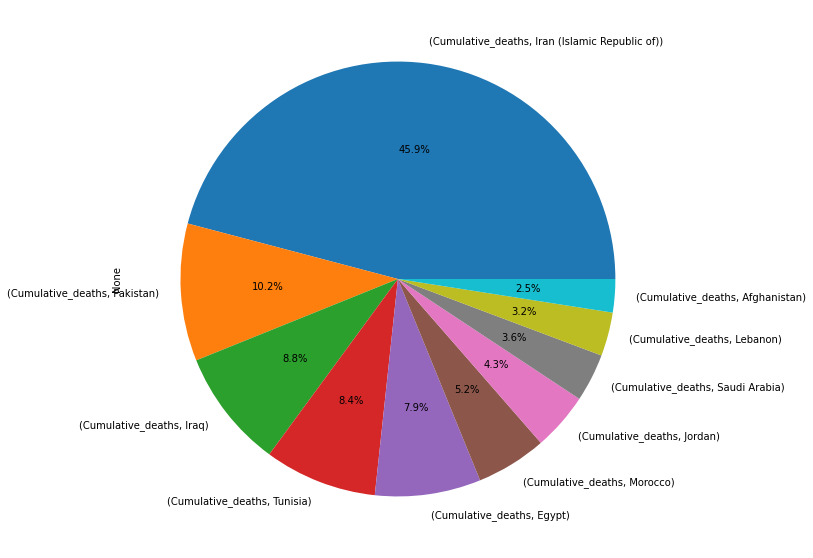

In [86]:
emro_death_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [87]:
emro_death_cases = Covid_19[Covid_19['WHO_region']=='EMRO']
# sum of total cases in Eastern Mediterranean

print('Eastern Mediterranean has a total Cumulative Cases of about', emro_death_cases['Cumulative_deaths'].sum()) 

Eastern Mediterranean has a total Cumulative Cases of about 214167536


`Iran` seems to have it worst among the countries in the Eastern Mediterranean, the fear of the economy collapsing when restrictions are put in place is one of the major factors that was said to have caused the virus. Iran is a country with a high population, and they have a number of poor citizens. <a href='https://www.atlanticcouncil.org/blogs/iransource/irans-covid-19-deaths-2-5-times-higher-than-healthy-ministry-numbers/'> Iranians</a>  also attribute inadequate testing and a slow rollout of vaccines to policies ordered by Supreme Leader Ayatollah Ali Khamenei. Despite all warnings, the regime has told Iranians to return to normal life, risking a new rise in cases as schools reopen and workers return to their offices.

# Coronavirus cases in Western Pacific which is WPRO

Countries in western pacific includes American Samoa, Australia, Brunei Darussalam, Cambodia, China, Cook Islands, Fiji, Guam, Hong Kong,Japan, Kiribati, Korea, Republic of Lao People’s Democratic Republic, Macau, Malaysia, Marshall Islands, Micronesia, Federated States of Mongolia, Nauru, New Zealand,Niue, Northern Mariana Islands,Palau, Papua New Guinea,Philippines, Samoa, Singapore, Solomon Islands, Taiwan, Tokelau, Tonga, Tuvalu,Vanuatu and Viet Nam

In [88]:
wpro_cases = Covid_19[Covid_19['WHO_region']=='WPRO']
#  top ten most affected countries
# top_countries=emro_cases.sort_values('Cumulative_cases',ascending=False).head(10)
# top_countries[['Country','Cumulative_cases']]

wpro_cases = pd.DataFrame(wpro_cases.groupby("Country")['Cumulative_cases']
                               .agg('sum')).sort_values(by='Cumulative_cases',ascending=False,axis=0)

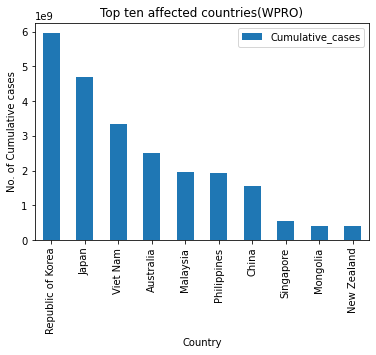

In [89]:
# visualize
# plt.bar(top_countries['Country'],top_countries['Cumulative_cases'],color="red")
# plt.xticks(rotation=90)
# plt.title("Top ten affected countries(Eastern Mediterranean)")
# plt.xlabel('countries')
# plt.ylabel('Total covid cases(millions)')
# plt.show()

wpro_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative cases',title = 'Top ten affected countries(WPRO)')
plt.show()

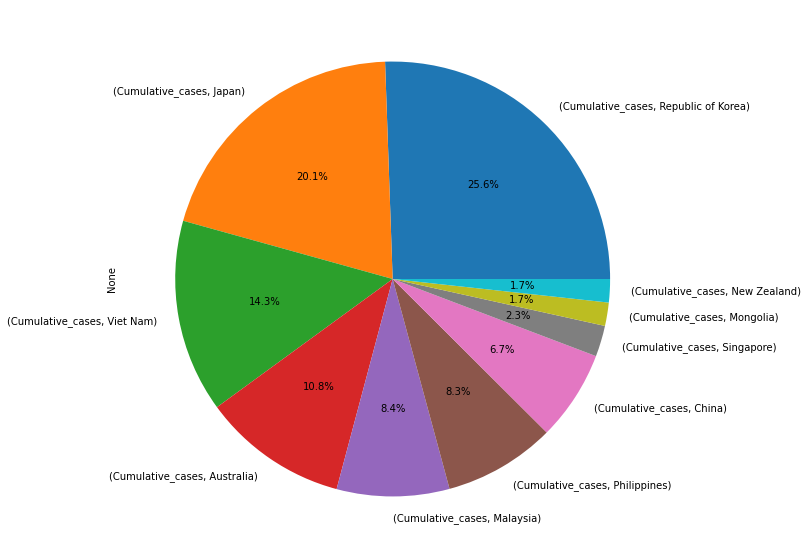

In [90]:
wpro_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [91]:
wpro_cases= Covid_19[Covid_19['WHO_region']=='WPRO']
# sum of total cases in Western Pacific

print('Western Pacific has a total Cumulative Cases of about', wpro_cases['Cumulative_cases'].sum()) 

Western Pacific has a total Cumulative Cases of about 23683657468


## Cumulative Deaths 

In [92]:
wpro_death_cases = Covid_19[Covid_19['WHO_region']=='WPRO']
# sum of total cases in Western Pacific
emro_death_cases[['Country','Cumulative_deaths','New_deaths']]

wpro_death_cases = pd.DataFrame(wpro_death_cases.groupby("Country")['Cumulative_deaths']
                               .agg('sum')).sort_values(by='Cumulative_deaths',ascending=False,axis=0)

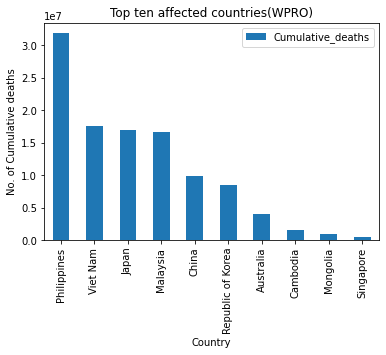

In [93]:
wpro_death_cases.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of Cumulative deaths',title = 'Top ten affected countries(WPRO)')
plt.show()

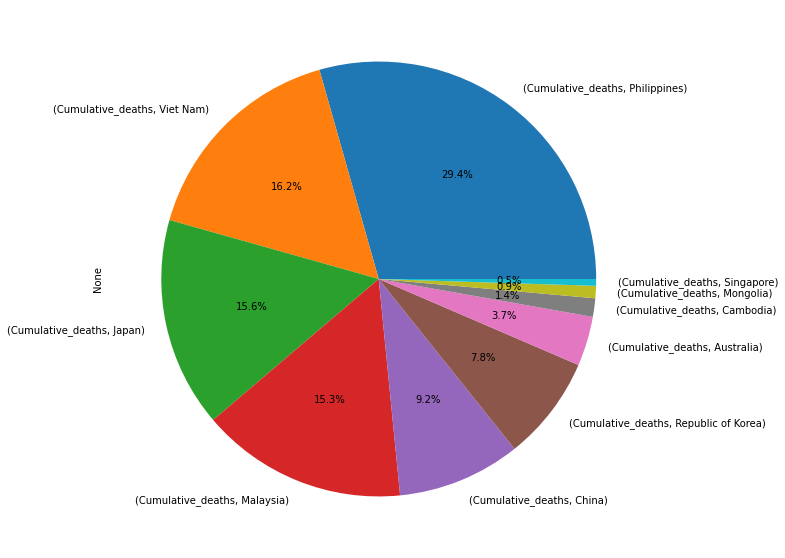

In [94]:
# plt.pie(top_countries['Total_deaths'],labels=top_countries['Countries'])
# plt.show()
wpro_death_cases.head(10).unstack(level=0).plot(
    kind='pie',
    stacked=True,
    subplots=True,
    autopct='%1.1f%%',
    figsize=(15, 10),
    legend=False,
    )
plt.show()

In [95]:
wpro_death_cases = Covid_19[Covid_19['WHO_region']=='WPRO']
# sum of total cases in Western Pacific
print('Western Pacific has a total Cumulative Cases of about', wpro_death_cases['Cumulative_deaths'].sum()) 

Western Pacific has a total Cumulative Cases of about 110523768


The Republic of Korea (South Korea) is one of the first countries to experience a COVID-19 outbreak and it was handled quite well with the relatively low number of cumulative deaths that they have, within two months they were <a href='https://direct.mit.edu/asep/article/20/2/41/97312/COVID-19-in-Korea-Success-Based-on-Past-Failure'>repotred able to stop the massive transmission of the virus </a>

While the Philippines, a country of about 111 million people, reported more deaths. it was <a href='https://www.aljazeera.com/news/2022/1/18/philippine-covid-deaths-may-be-double-than-current-number-report'>reported</a> that the rise in death cases was due to other underlining health challenges like heart diseases, stroke, cancer and respiratory diseases such as tuberculosis which were exacerbated by Covid19.

`Australia` had the fewest deaths (7,809). This is attributable to the Australian government's prompt action, which resulted in the imposition of limitations as soon as the first coronavirus case was reported. Lockdowns and restrictions on travel and movement helped to greatly slow the spread of the virus. Among the restrictions that were implemented were the 150-person limit for nightclubs and places of worship, as well as the requirement that spaces hold no more than two square metres of space between each other. Cinemas and stadiums are subject to several limitations, including a 50% capacity limit. For more information, please visit

`The USA` seems to have the highest number of deaths again, followed closely by Brazil this time, then India. There seems to be a change in the list of countries with death cases as compared to the countries with new cases. The following explanation of the causes of the high number of instances in the USA highlights the first and most important factor: the <a href='https://www.cbsnews.com/news/us-covid-19-cases-testing/'> tardy response.</a> The US government took a long time to respond to the problem, which allowed the virus to spread further. The US government took a long time to set up a health care system, stop other travel, and do COVID-19 tests. Additionally, the populace was unaware of the rules established to stop the virus's transmission, such as banning the wearing of facial coverings. Some states in the United States lacked the testing infrastructure needed to thoroughly test their residents.You can <a href='https://www.science.org/content/article/united-states-leads-coronavirus-cases-not-pandemic-response'> read</a> about it 


While on the WHO databank, the Democratic People's Republic of Korea seems not to have any cases reported, In the <a href='https://reliefweb.int/report/democratic-peoples-republic-korea/covid-19-north-korea-state-fuelled-tragedy'>news</a> and from official releases so far there seems to national crises over there in the country so there must be like rancour between the two parties, from <a href='https://covid19.who.int/region/wpro/country/tk'> WHO</a> database, Tokelau a country of about 1,398 according to <a href='https://www.worldometers.info/world-population/tokelau-population/'>worldmeter</a> has been vaccinated largely, and they've been able to curtail the virus to the bare minimum.

Countries like `India` and `Brazil` had it very bad at the beginning of the pandemic because of their population and it was so severe that <a href='https://www.washingtonpost.com/world/2021/04/27/india-covid-surge-faq/'>WHO declared them an epicentre </a>

`In 2020`; at the beginning of the pandemic when proper measures hadn't been put in place yet we had top countries like the USA, India, Brazil, Russia, France, the UK, Turkey, Italy, Spain and Germany among the heavily hit countries, while `In 2021` we still had same countries in top 10 but Germany moved some places higher due to several reasons like a large number of unvaccinated people, waning immunity, fewer contact restrictions, the new variant more infectious and seasonal effects more about it can be read <a href='https://www.dw.com/en/5-reasons-germanys-covid-19-infections-are-soaring/a-59793087'>here</a> while Russia moved some places down due to how they have been able to restrict movement among their people. 

Meanwhile `In 2022` we still USA has the world number and Germany, France, the republic of Korea, Japan, Italy, brazil, Russia, the UK, and Australia; Now every country has opened up because of the belief we all have in the vaccine, we have seen a reduced in the number of covid19 death cases but it's still on the rise. the vaccine has helped mitigate its effects. 
 

## Looking at the Vaccination database

To intrigue further at why the USA seem to have such numbers in the number of deaths and cases, I'd intrigue further using the vaccination database

In [96]:
Vaccinated =pd.read_csv('https://covid19.who.int/who-data/vaccination-data.csv')
    
Vaccinated.head()

,COUNTRY,ISO3,WHO_REGION,DATA_SOURCE,DATE_UPDATED,TOTAL_VACCINATIONS,PERSONS_VACCINATED_1PLUS_DOSE,TOTAL_VACCINATIONS_PER100,PERSONS_VACCINATED_1PLUS_DOSE_PER100,PERSONS_FULLY_VACCINATED,PERSONS_FULLY_VACCINATED_PER100,VACCINES_USED,FIRST_VACCINE_DATE,NUMBER_VACCINES_TYPES_USED,PERSONS_BOOSTER_ADD_DOSE,PERSONS_BOOSTER_ADD_DOSE_PER100
0,Afghanistan,AFG,EMRO,REPORTING,2022-12-05,12304901.0,11320910,31.609,29.081,10615628,27.270,"AstraZeneca - Vaxzevria,Beijing CNBG - BBIBP-C...",2021-02-22,11.0,NaN,NaN
1,Albania,ALB,EURO,REPORTING,2022-11-27,3017443.0,1341413,104.900,47.134,1269112,44.594,"AstraZeneca - Vaxzevria,Gamaleya - Gam-Covid-V...",2021-01-13,5.0,373263.0,13.116
2,Algeria,DZA,AFRO,REPORTING,2022-09-04,15267442.0,7840131,34.817,17.879,6481186,14.780,"Beijing CNBG - BBIBP-CorV,Gamaleya - Gam-Covid...",2021-01-30,4.0,575651.0,1.313
3,American Samoa,ASM,WPRO,REPORTING,2022-08-23,111316.0,44885,201.670,81.318,41423,75.046,"Janssen - Ad26.COV 2-S,Moderna - Spikevax,Pfiz...",2020-12-21,3.0,24160.0,43.770
4,Andorra,AND,EURO,REPORTING,2022-11-13,154367.0,57901,199.800,76.009,53485,70.211,"AstraZeneca - Vaxzevria,Moderna - Spikevax,Pfi...",2021-01-20,3.0,42981.0,56.423


## Data Description 
* `COUNTRY` 	 String 	Country, territory, area
* `ISO3` 	String	ISO Alpha-3 country code
* `WHO_REGION`  	String	WHO regional offices: WHO Member States are grouped into six WHO regions: Regional Office for Africa (AFRO), Regional Office for the Americas (AMRO), Regional Office for South-East Asia (SEARO), Regional Office for Europe (EURO), Regional Office for the Eastern Mediterranean (EMRO), and Regional Office for the Western Pacific (WPRO).
* `DATA_SOURCE` 	String	Indicates data source: - REPORTING: Data reported by Member States, or sourced from official reports - OWID: Data sourced from Our World in Data: https://ourworldindata.org/covid-vaccinations
* `DATE_UPDATED`	Date	Date of last update
* `TOTAL_VACCINATIONS`  	Integer	Cumulative total vaccine doses administered
* `PERSONS_VACCINATED_1PLUS_DOSE`   	Decimal	Cumulative number of persons vaccinated with at least one dose
* `TOTAL_VACCINATIONS_PER100`   	Integer	Cumulative total vaccine doses administered per 100 population
* `PERSONS_VACCINATED_1PLUS_DOSE_PER100`	Decimal	Cumulative persons vaccinated with at least one dose per 100 population
* `PERSONS_FULLY_VACCINATED`	Integer	Cumulative number of persons fully vaccinated
* `PERSONS_FULLY_VACCINATED_PER100` 	Decimal	Cumulative number of persons fully vaccinated per 100 population
* `VACCINES_USED`   	String	Combined short name of vaccine: “Company - Product name” (see below)
* `FIRST_VACCINE_DATE`  	Date	Date of first vaccinations. Equivalent to start/launch date of the first vaccine administered in a country.
* `NUMBER_VACCINES_TYPES_USED`  	Integer	Number of vaccine types used per country, territory, area
* `PERSONS_BOOSTER_ADD_DOSE`	Integer	Persons received booster or additional dose
* `PERSONS_BOOSTER_ADD_DOSE_PER100` 	Decimal	Persons received booster or additional dose per 100 population

In [97]:
Vaccinated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   COUNTRY                               229 non-null    object 
 1   ISO3                                  229 non-null    object 
 2   WHO_REGION                            229 non-null    object 
 3   DATA_SOURCE                           229 non-null    object 
 4   DATE_UPDATED                          229 non-null    object 
 5   TOTAL_VACCINATIONS                    228 non-null    float64
 6   PERSONS_VACCINATED_1PLUS_DOSE         229 non-null    int64  
 7   TOTAL_VACCINATIONS_PER100             228 non-null    float64
 8   PERSONS_VACCINATED_1PLUS_DOSE_PER100  229 non-null    float64
 9   PERSONS_FULLY_VACCINATED              229 non-null    int64  
 10  PERSONS_FULLY_VACCINATED_PER100       229 non-null    float64
 11  VACCINES_USED      

I'd be working with just the TOTAL_VACCINATIONS,  PERSONS_FULLY_VACCINATED, PERSONS_BOOSTER_ADD_DOSE and DATE_UPDATED since vaccination helps reduce the severity of the infection and not necessarily stopping one from contracting it.

In [98]:
Vaccinated = Vaccinated[['COUNTRY', 'WHO_REGION', 'TOTAL_VACCINATIONS', 'PERSONS_FULLY_VACCINATED', 'PERSONS_BOOSTER_ADD_DOSE', 'DATE_UPDATED']]

In [99]:
Vaccinated.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED
0,Afghanistan,EMRO,12304901.0,10615628,NaN,2022-12-05
1,Albania,EURO,3017443.0,1269112,373263.0,2022-11-27
2,Algeria,AFRO,15267442.0,6481186,575651.0,2022-09-04
3,American Samoa,WPRO,111316.0,41423,24160.0,2022-08-23
4,Andorra,EURO,154367.0,53485,42981.0,2022-11-13


In [100]:
Vaccinated['DATE_UPDATED'] = pd.to_datetime(Vaccinated['DATE_UPDATED'], errors='coerce')

Vaccinated['year'] = Vaccinated['DATE_UPDATED'].dt.year

In [101]:
Vaccinated.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED,year
0,Afghanistan,EMRO,12304901.0,10615628,NaN,2022-12-05,2022
1,Albania,EURO,3017443.0,1269112,373263.0,2022-11-27,2022
2,Algeria,AFRO,15267442.0,6481186,575651.0,2022-09-04,2022
3,American Samoa,WPRO,111316.0,41423,24160.0,2022-08-23,2022
4,Andorra,EURO,154367.0,53485,42981.0,2022-11-13,2022


In [102]:
Total_Vaccinated = pd.DataFrame(Vaccinated.groupby("COUNTRY")['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by='TOTAL_VACCINATIONS',ascending=False,axis=0)

Total_Vaccinated.head()

,TOTAL_VACCINATIONS
COUNTRY,
China,3.465114e+09
India,2.199517e+09
United States of America,6.473451e+08
Brazil,4.937009e+08
Indonesia,4.420133e+08


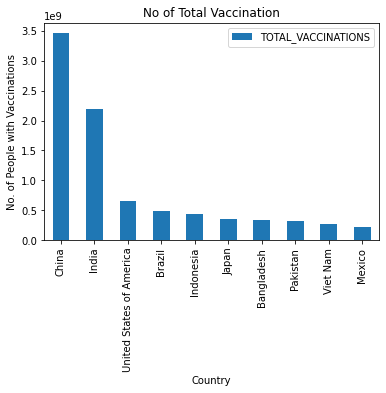

In [103]:
Total_Vaccinated.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of People with Vaccinations', title = 'No of Total Vaccination')
plt.show()


In [104]:
Full_Vaccinated = pd.DataFrame(Vaccinated.groupby("COUNTRY")['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by='PERSONS_FULLY_VACCINATED',ascending=False,axis=0)

Full_Vaccinated.head()

,PERSONS_FULLY_VACCINATED
COUNTRY,
China,1277356924
India,950990357
United States of America,225602016
Indonesia,172298515
Brazil,168409005


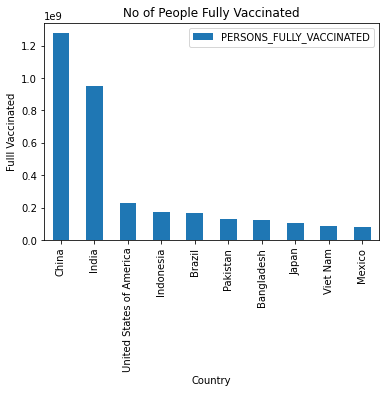

In [105]:
Full_Vaccinated.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'Fulll Vaccinated',title = 'No of People Fully Vaccinated')
plt.show()

In [106]:
PERSONS_BOOSTER_ADD_DOSE = pd.DataFrame(Vaccinated.groupby("COUNTRY")['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by='PERSONS_BOOSTER_ADD_DOSE',ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE.head()

,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,
China,804850776.0
India,223044906.0
United States of America,113031737.0
Brazil,106308588.0
Japan,84320120.0


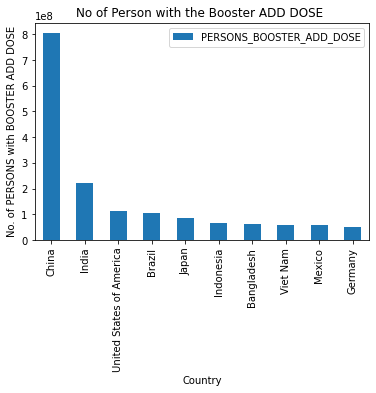

In [107]:
PERSONS_BOOSTER_ADD_DOSE.head(10).plot(kind='bar',  xlabel = 'Country', ylabel = 'No. of PERSONS with BOOSTER ADD DOSE',title = 'No of Person with the Booster ADD DOSE ')
plt.show()

In [108]:
TOTAL_VACCINATIONS_year = pd.DataFrame(Vaccinated.groupby(["COUNTRY",'year'])['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by=['year', 'TOTAL_VACCINATIONS'],ascending=False,axis=0)

TOTAL_VACCINATIONS_year.head(10)

,,TOTAL_VACCINATIONS
COUNTRY,year,
China,2022,3.465114e+09
India,2022,2.199517e+09
United States of America,2022,6.473451e+08
Brazil,2022,4.937009e+08
Indonesia,2022,4.420133e+08
Japan,2022,3.492343e+08
Bangladesh,2022,3.390085e+08
Pakistan,2022,3.166522e+08
Viet Nam,2022,2.646359e+08


In [109]:
PERSONS_BOOSTER_ADD_DOSE_year = pd.DataFrame(Vaccinated.groupby(["COUNTRY",'year'])['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_BOOSTER_ADD_DOSE'],ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE_year.head(10)

,,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,year,
China,2022,804850776.0
India,2022,223044906.0
United States of America,2022,113031737.0
Brazil,2022,106308588.0
Japan,2022,84320120.0
Indonesia,2022,66261285.0
Bangladesh,2022,63379755.0
Viet Nam,2022,57360122.0
Mexico,2022,57026630.0


In [110]:
PERSONS_FULLY_VACCINATED_year = pd.DataFrame(Vaccinated.groupby(["COUNTRY",'year'])['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_FULLY_VACCINATED'],ascending=False,axis=0)

PERSONS_FULLY_VACCINATED_year.head(10)

,,PERSONS_FULLY_VACCINATED
COUNTRY,year,
China,2022,1277356924
India,2022,950990357
United States of America,2022,225602016
Indonesia,2022,172298515
Brazil,2022,168409005
Pakistan,2022,131361137
Bangladesh,2022,126286114
Japan,2022,102995116
Viet Nam,2022,85239151


In [111]:
Vaccinated['year'].unique()

array([2022, 2021])

In [112]:
Vaccinated_cases_2021 = Vaccinated[Vaccinated['year']== 2021]

Vaccinated_cases_2021.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED,year
26,"Bonaire, Sint Eustatius and Saba",AMRO,35845.0,16736,NaN,2021-09-01,2021
174,"Saint Helena, Ascension and Tristan da Cunha",AFRO,7892.0,3531,NaN,2021-05-05,2021


In [113]:
TOTAL_VACCINATIONS_year_2021 = pd.DataFrame(Vaccinated_cases_2021.groupby(["COUNTRY",'year'])['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by=['year', 'TOTAL_VACCINATIONS'],ascending=False,axis=0)

TOTAL_VACCINATIONS_year_2021.head(10)

,,TOTAL_VACCINATIONS
COUNTRY,year,
"Bonaire, Sint Eustatius and Saba",2021,35845.0
"Saint Helena, Ascension and Tristan da Cunha",2021,7892.0


In [114]:
PERSONS_BOOSTER_ADD_DOSE_year_2021 = pd.DataFrame(Vaccinated_cases_2021.groupby(["COUNTRY",'year'])['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_BOOSTER_ADD_DOSE'],ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE_year_2021.head(10)

,,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,year,
"Bonaire, Sint Eustatius and Saba",2021,0.0
"Saint Helena, Ascension and Tristan da Cunha",2021,0.0


#### Obviously there should be none since the case of taking boosters started in 2022

In [115]:
PERSONS_FULLY_VACCINATED_year_2021 = pd.DataFrame(Vaccinated_cases_2021.groupby(["COUNTRY",'year'])['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_FULLY_VACCINATED'],ascending=False,axis=0)

PERSONS_FULLY_VACCINATED_year_2021.head(10)

,,PERSONS_FULLY_VACCINATED
COUNTRY,year,
"Bonaire, Sint Eustatius and Saba",2021,16736
"Saint Helena, Ascension and Tristan da Cunha",2021,3531


At 2021 citizens of Bonaire, Sint Eustatius and Saba and Saint Helena are the only ones that have fully vaccinated people.  

In [116]:
Vaccinated_cases_2022 = Vaccinated[Vaccinated['year']== 2022]

Vaccinated_cases_2022.head()

,COUNTRY,WHO_REGION,TOTAL_VACCINATIONS,PERSONS_FULLY_VACCINATED,PERSONS_BOOSTER_ADD_DOSE,DATE_UPDATED,year
0,Afghanistan,EMRO,12304901.0,10615628,NaN,2022-12-05,2022
1,Albania,EURO,3017443.0,1269112,373263.0,2022-11-27,2022
2,Algeria,AFRO,15267442.0,6481186,575651.0,2022-09-04,2022
3,American Samoa,WPRO,111316.0,41423,24160.0,2022-08-23,2022
4,Andorra,EURO,154367.0,53485,42981.0,2022-11-13,2022


In [117]:
TOTAL_VACCINATIONS_year_2022 = pd.DataFrame(Vaccinated_cases_2022.groupby(["COUNTRY",'year'])['TOTAL_VACCINATIONS']
                               .agg('sum')).sort_values(by=['year', 'TOTAL_VACCINATIONS'],ascending=False,axis=0)

TOTAL_VACCINATIONS_year_2022.head(10)

,,TOTAL_VACCINATIONS
COUNTRY,year,
China,2022,3.465114e+09
India,2022,2.199517e+09
United States of America,2022,6.473451e+08
Brazil,2022,4.937009e+08
Indonesia,2022,4.420133e+08
Japan,2022,3.492343e+08
Bangladesh,2022,3.390085e+08
Pakistan,2022,3.166522e+08
Viet Nam,2022,2.646359e+08


In [118]:
PERSONS_BOOSTER_ADD_DOSE_year_2022 = pd.DataFrame(Vaccinated_cases_2022.groupby(["COUNTRY",'year'])['PERSONS_BOOSTER_ADD_DOSE']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_BOOSTER_ADD_DOSE'],ascending=False,axis=0)

PERSONS_BOOSTER_ADD_DOSE_year_2022.head(10)

,,PERSONS_BOOSTER_ADD_DOSE
COUNTRY,year,
China,2022,804850776.0
India,2022,223044906.0
United States of America,2022,113031737.0
Brazil,2022,106308588.0
Japan,2022,84320120.0
Indonesia,2022,66261285.0
Bangladesh,2022,63379755.0
Viet Nam,2022,57360122.0
Mexico,2022,57026630.0


#### We started collecting the booster dose in early 2022 since we need more doses to keep us immune from the virus

In [119]:
PERSONS_FULLY_VACCINATED_year_2022 = pd.DataFrame(Vaccinated_cases_2022.groupby(["COUNTRY",'year'])['PERSONS_FULLY_VACCINATED']
                               .agg('sum')).sort_values(by=['year', 'PERSONS_FULLY_VACCINATED'],ascending=False,axis=0)

PERSONS_FULLY_VACCINATED_year_2022.head(10)

,,PERSONS_FULLY_VACCINATED
COUNTRY,year,
China,2022,1277356924
India,2022,950990357
United States of America,2022,225602016
Indonesia,2022,172298515
Brazil,2022,168409005
Pakistan,2022,131361137
Bangladesh,2022,126286114
Japan,2022,102995116
Viet Nam,2022,85239151


## Conclusion

In this analysis, we've learned how China, despite its population, was able to vaccinate most of its citizens, which helped reduce the number of deaths and COVID cases in recent times and cumulatively, and India seems to be impressive too.
We also know that the `USA` has the most cases worldwide.
`Brazil` has the most cases in South America.
`India` has the most cases in Asia.